**TITLE: CLASSIFICATION OF WINES INTO ONE OF THE CLASSES OF WINE BASED ON THEIR OTHER CHARACTERSTICS USING LINEAR DISCRIMINANT ALGORITHM** 

**INTRODUCTION**

Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples. In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. Here we will be using linear regression for prediction which is one of the most widely used Supervised ML algorithm.

Linear Discriminant Analysis (LDA) is a dimensionality reduction technique. As the name implies dimensionality reduction techniques reduce the number of dimensions (i.e. variables) in a dataset while retaining as much information as possible.

Linear Discriminant Analysis, or LDA, uses the information from both features to create a new axis and projects the data on to the new axis in such a way as to minimizes the variance and maximizes the distance between the means of the two classes.

*Assumptions*:

-> Independent variables are normal for each level of the grouping variable.

-> Variances among group variables are the same across levels of predictors.

-> Predictive power can decrease with an increased correlation between predictor variables.

-> Participants are assumed to be randomly sampled, and a participant's score on one variable is assumed to be independent of scores on that variable for all other participants.

**OBJECTIVE**

To predict the  probability of a wine belonging to one of three classes and classify the wine into three classes based on the characterstic they posses.

**PACKAGES AND LIBRARIES**

In [ ]:
#Loading the pandas and numpy that will be used to handle the data.
import pandas as pd
import numpy as np

#Loading matplotlib and seaborn which is required to perform the exploratory data analysis.
import seaborn as sns 
import matplotlib.pyplot as plt

#Loading all other necessary libraries required for the analysis.
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.datasets import load_wine

**DATA DESCRIPTION**

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. 

The attributes are,
1) Alcohol

2) Malic acid

3) Ash

4) Alcalinity of ash

5) Magnesium

6) Total phenols

7) Flavanoids

8) Nonflavanoid phenols

9) Proanthocyanins

10)Color intensity

11)Hue

12)OD280/OD315 of diluted wines

13)Proline

In a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging.



In [ ]:
#Loading the required dataset.
wine = load_wine()

#Dataset is been segeregated as features and study variable set.
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [ ]:
X #Dataframe of Features are obtained below

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
y #study variable

#checking how many classes are there in the study variable.
y.unique

<bound method Categorical.unique of ['class_0', 'class_0', 'class_0', 'class_0', 'class_0', ..., 'class_2', 'class_2', 'class_2', 'class_2', 'class_2']
Length: 178
Categories (3, object): ['class_0', 'class_1', 'class_2']>

In [ ]:
#Creating a DataFrame containing both the features and classes.
wine1 = X.join(pd.Series(y, name='class'))
wine1 = pd.DataFrame(wine1)

**EXPLORATORY DATA ANALYSIS**

In [ ]:
#Obtaining the dimension of the dataset.
wine1.shape

(178, 14)

It is observed that the dataset comprises of 178 records and 14 columns(variables) which are described in the data description. 

In [ ]:
#Using info() function to understand if ther is any null values in the dataset.
wine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   alcohol                       178 non-null    float64 
 1   malic_acid                    178 non-null    float64 
 2   ash                           178 non-null    float64 
 3   alcalinity_of_ash             178 non-null    float64 
 4   magnesium                     178 non-null    float64 
 5   total_phenols                 178 non-null    float64 
 6   flavanoids                    178 non-null    float64 
 7   nonflavanoid_phenols          178 non-null    float64 
 8   proanthocyanins               178 non-null    float64 
 9   color_intensity               178 non-null    float64 
 10  hue                           178 non-null    float64 
 11  od280/od315_of_diluted_wines  178 non-null    float64 
 12  proline                       178 non-null    floa

From the above table it is observed that there does not exist any null value in the dataset hence we can further proceed with the analysis.

Our study variable in the analysis is Y-type of wine which takes categories **class_0, class_1, class_2** i.e the wine belongs to class_0, class_1, class_2.

In [ ]:
#Obtaining the descriptive measure using describe() function
wine1.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Thus, from the above summary we observe that most of the independent variables are having mean equal to median therefor we can assume that the features are normally distributed.
On similar lines we can draw meaningful insights about the other variables using the summary table.

In [ ]:
#For every class, we create a vector with the means of each feature.
class_feature_means = pd.DataFrame(columns=wine.target_names)
for c, rows in wine1.groupby('class'):
    class_feature_means[c] = rows.mean()
class_feature_means

,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


NORMALITY CHECK FOR INDEPENDENT VARIABLES

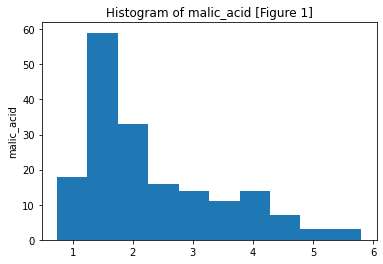

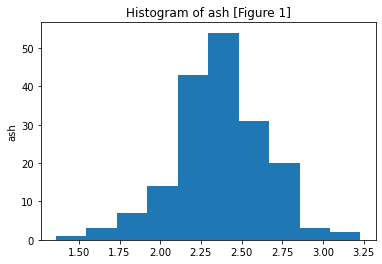

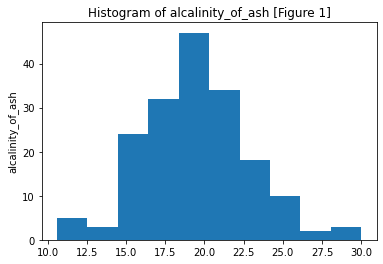

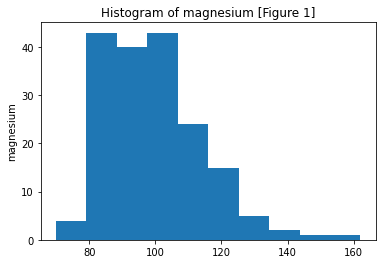

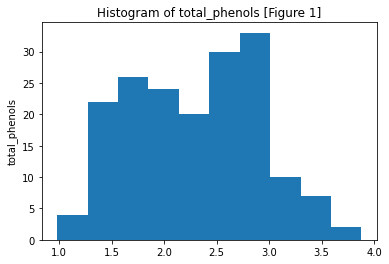

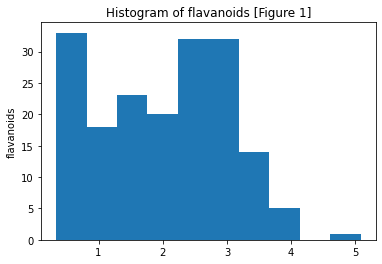

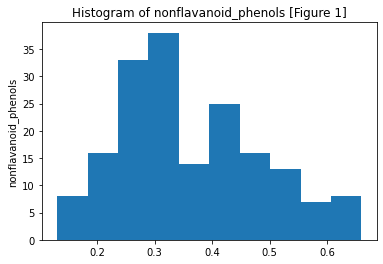

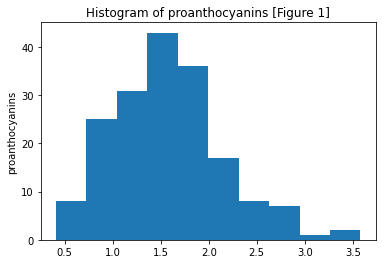

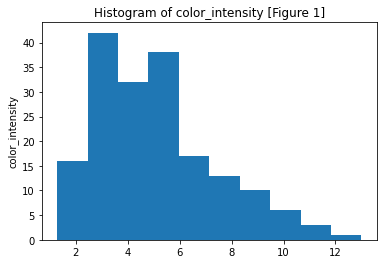

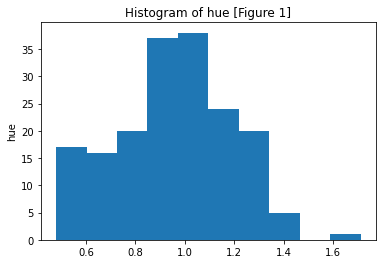

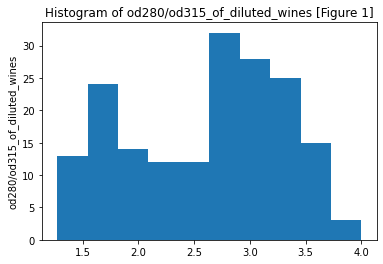

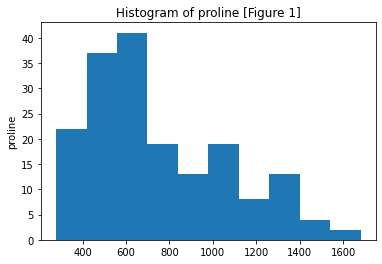

In [ ]:
#Here we obtain the histograms for all the independent variables to know the distribution of the data.
data=X.columns
data
value=data[1:13]
value
for i in value:
  plt.hist(X[i])
  plt.ylabel(i)
  plt.title("Histogram of "+i+" [Figure 1]")
  plt.show()

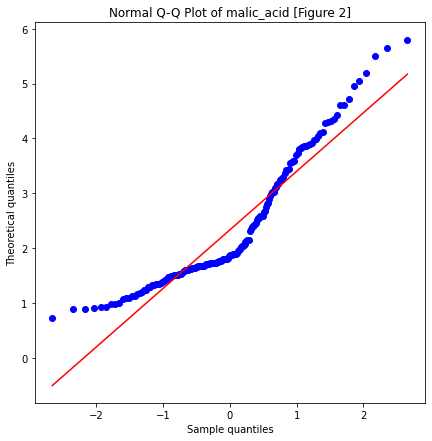

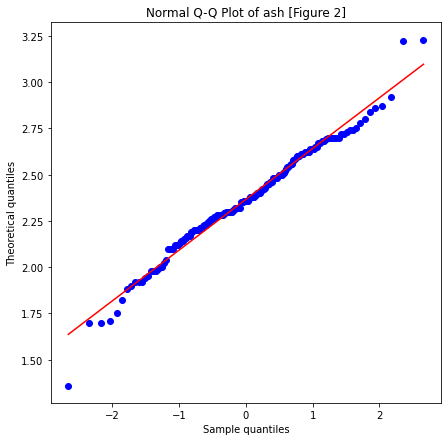

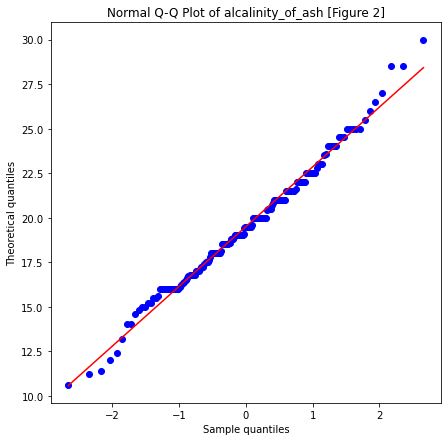

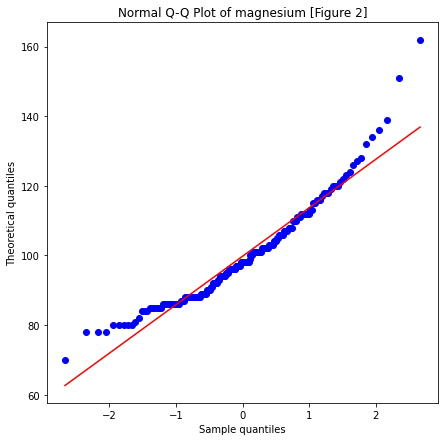

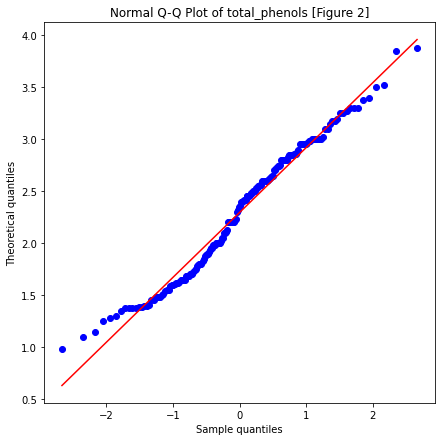

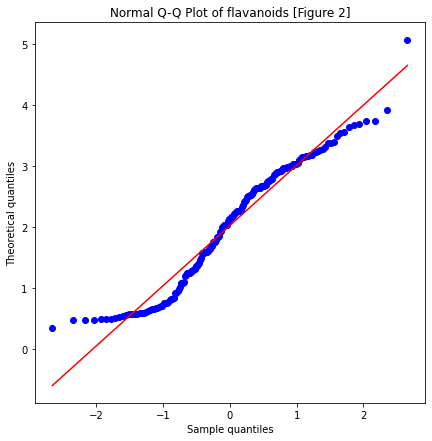

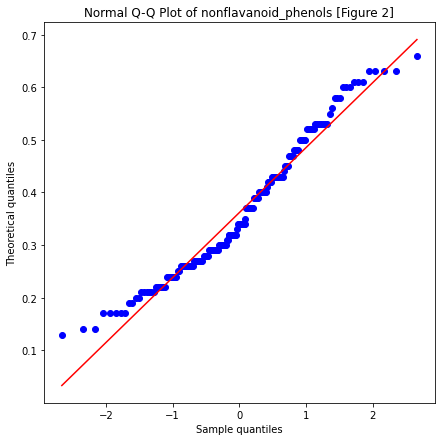

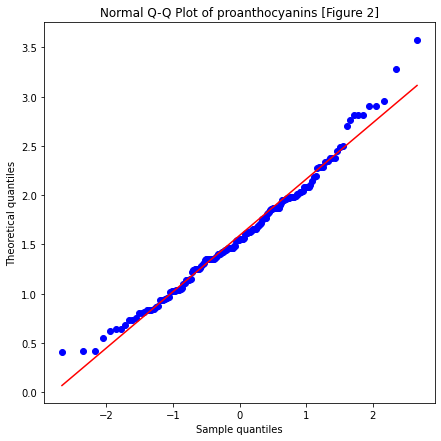

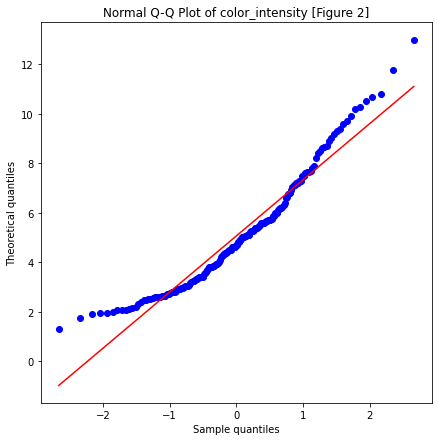

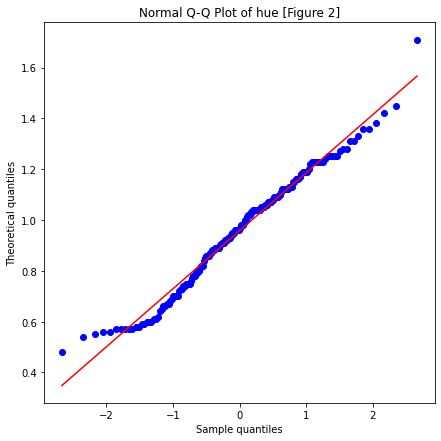

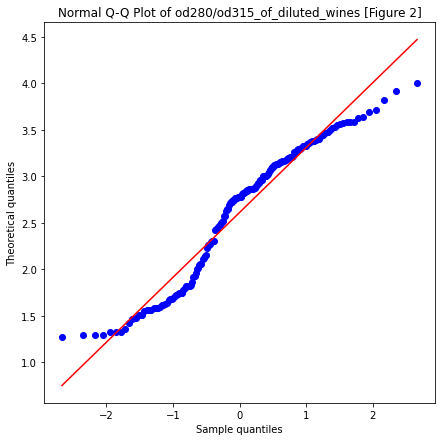

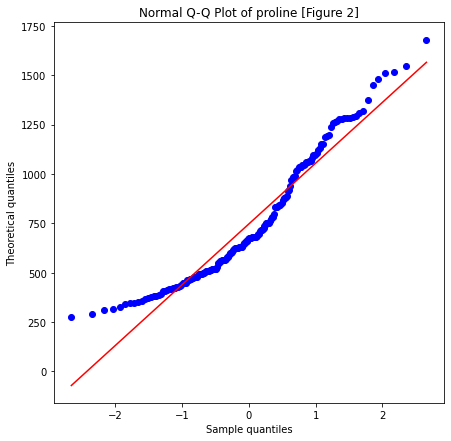

In [ ]:
#Obtaining the Q-Q plot to check for the normality assumption.
import scipy.stats as stats
data=X.columns
data
value=data[1:13]
value
for i in value:
  plt.figure(figsize=(7,7))
  stats.probplot(X[i], dist="norm", plot=plt)
  plt.title("Normal Q-Q Plot of "+i+" [Figure 2]")
  plt.xlabel("Sample quantiles")
  plt.ylabel("Theoretical quantiles")
  plt.show()

In [ ]:
#Performing the normality check for independent variable using shapiro wilks test.
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
data=X.columns
data
value=data[1:13]
value
for i in value:
  print("Normality test for " +i)
  stat, p = shapiro(X[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # interpret
  alpha = 0.05
  if p > alpha:
	  print(i+ 'sample of looks normally distributed (fail to reject H0)')
  else:
	  print(i+ 'sample does not look normally distributed (reject H0)')


Normality test for malic_acid
Statistics=0.889, p=0.000
malic_acidsample does not look normally distributed (reject H0)
Normality test for ash
Statistics=0.984, p=0.039
ashsample does not look normally distributed (reject H0)
Normality test for alcalinity_of_ash
Statistics=0.990, p=0.264
alcalinity_of_ashsample of looks normally distributed (fail to reject H0)
Normality test for magnesium
Statistics=0.938, p=0.000
magnesiumsample does not look normally distributed (reject H0)
Normality test for total_phenols
Statistics=0.977, p=0.004
total_phenolssample does not look normally distributed (reject H0)
Normality test for flavanoids
Statistics=0.955, p=0.000
flavanoidssample does not look normally distributed (reject H0)
Normality test for nonflavanoid_phenols
Statistics=0.963, p=0.000
nonflavanoid_phenolssample does not look normally distributed (reject H0)
Normality test for proanthocyanins
Statistics=0.981, p=0.014
proanthocyaninssample does not look normally distributed (reject H0)
Nor

Thus we observe from the histograms, qq plot and shapiro wilks normality test that among all the features only the varible alcalinity of ash is normaly distributed i.e. it has symmetric graph while rest of the independent variables are either positively skewed or negatively skewed.

**ANALYSIS**

In [ ]:
#Scaling of indepent variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

#LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1.
le = LabelEncoder()

#Performing label encoding on study variables.
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Thus the independent variable are scaled and label encoding has been performed for the study variable that is class of wine.

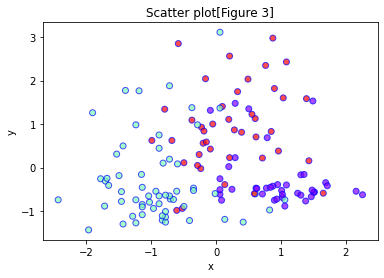

In [ ]:
#we plot the scatter plot for the features and use a different color for each class.
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow', alpha=0.7, edgecolors='b')
plt.title("Scatter plot[Figure 3]")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Here, the data points are not randomly clustered they are not clustered seperately in class group of wine to which they belong.

MODEL BUILDING

In [ ]:
#Number of components (<=,min(n_classes - 1, n_features))
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


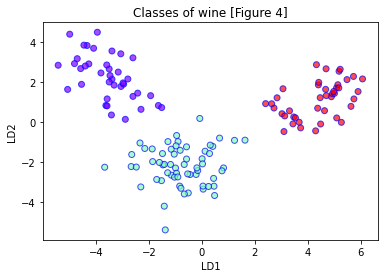

In [ ]:
#we plot the two LDA components for the train data.
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='rainbow', alpha=0.7,edgecolors='b')
plt.title("Classes of wine [Figure 4]")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()

Thus, now observe that after fitting the linear discriminant analysis the data points are classified according to the different types of wines.

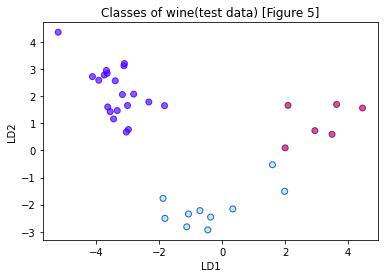

In [ ]:
#we plot the two LDA components for the test data.
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='rainbow',alpha=0.7,edgecolors='b')
plt.title("Classes of wine(test data) [Figure 5]")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()

Thus, now observe that after fitting the linear discriminant analysis the data points are classified according to the different types of wines for the test data.

PREDICTIONS AND CALCULATIONS OF ACCURACY MEASURE

In [ ]:
#Prediction
y_pred=lda.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2,
       0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 1])

In [ ]:
#Defining model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Evaluating the model using accuracy
scores = cross_val_score(lda, X_train,y_train, scoring='accuracy', cv=cv, n_jobs=-1)#accuracy score will be computed for each observations
np.mean(scores)

1.0

In [ ]:
#Evaluating the model using accuracy
scores = cross_val_score(lda, X_train,y_train, scoring='f1_macro', cv=cv, n_jobs=-1)#accuracy score will be computed for each observations
np.mean(scores)

1.0

Since the  samples are balanced across target classes hence the accuracy and the F1-score are almost equal which is 1. Thus, we can also conclude that our linear discriminant classifier is good in predicting clas_1 wine as class_1 type wine.

In [ ]:
#checking the accuracy measure
import sklearn.metrics as metrics
print('Mean squared error:', metrics.mean_squared_error(y_test,y_pred))#score() gives classification accuracy measure
print('Root Mean squared error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean absolute error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean squared error: 0.0
Root Mean squared error: 0.0
Mean absolute error: 0.0


Since it is observed that the value of mean squared error, root mean squared error and mean absolute error is 0 thus it indicates that the classifier is very accurate in the prediction of probability of wine belonging to k class.

**CONCLUSION**

Thus from the above analysis and model evaluation it is observed that the classifier is good and very accurate in classifying the wine types.